### import libs

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.linear_model import Lasso
import seaborn as sns 

### import selected features from file

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PSS/Stress Prediction M2-20210521T093603Z-001/Stress Prediction M2/selected_features.csv')
df.drop(['dance', 'wealthy', 'fashion'], axis = 1, inplace=True)
df.head()

,pss_score,help,pride,suffering,journalism,blue_collar_job,reading,anonymity,war,poor,pain
0,14,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,15,0.00641,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.003205,0.000000,0.000000
2,15,0.00641,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.003205,0.000000,0.000000
3,22,0.00000,0.0,0.002899,0.0,0.001449,0.0,0.001449,0.000000,0.001449,0.002899
4,20,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


### normalize dataframe

In [4]:
#cols_to_norm =['help', 'pride', 'suffering', 'journalism','blue_collar_job','reading','anonymity','war','poor','pain']
cols_to_norm =['pss_score']
#df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df.head()

,pss_score,help,pride,suffering,journalism,blue_collar_job,reading,anonymity,war,poor,pain
0,14,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,15,0.00641,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.003205,0.000000,0.000000
2,15,0.00641,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.003205,0.000000,0.000000
3,22,0.00000,0.0,0.002899,0.0,0.001449,0.0,0.001449,0.000000,0.001449,0.002899
4,20,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


### lasso regression

In [6]:
y_data = df['pss_score']
x_data = df[['help', 'pride', 'suffering', 'journalism','blue_collar_job','reading','anonymity','war','poor','pain']]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

#### testing & training

In [7]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [8]:
lasso_model = Lasso(alpha=1.0, normalize=True)
lasso=lasso_model.fit(x_train , y_train)
lasso_predict = lasso.predict(x_test)
Lasso_MAPE = MAPE(y_test,lasso_predict)
print("Mean Absolute Percentage Error(MAPE) value: ",Lasso_MAPE)
Accuracy = 100 - Lasso_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(Accuracy))

Mean Absolute Percentage Error(MAPE) value:  17.5282367973839
Accuracy of Lasso Regression: 82.47%.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


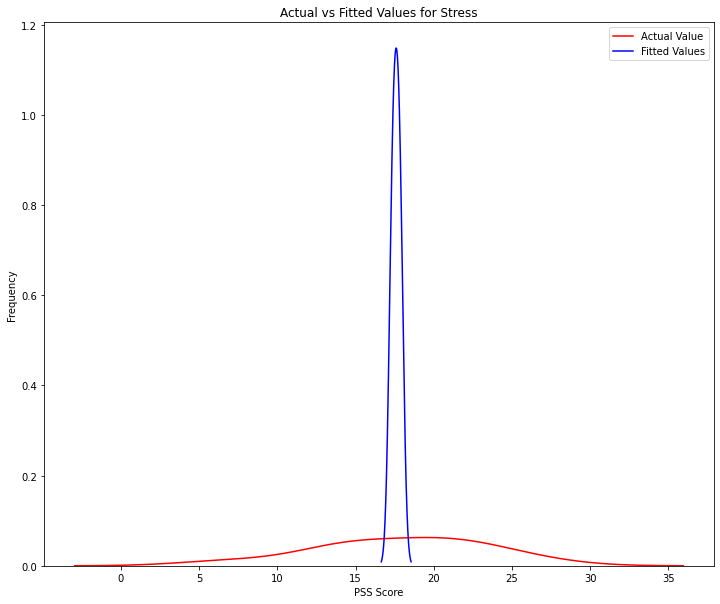

In [15]:
width = 12
height = 10

plt.figure(figsize=(width, height))
ax1 = sns.distplot(df['pss_score'], hist=False, color="r", label="Actual Value")
ax2 = sns.distplot(lasso_predict, hist=False, color="b", label="Predicted Values" , ax=ax1)
#putting labels inside the plot box
plt.legend(labels=['Actual Value', 'Fitted Values'])
plt.title('Actual vs Fitted Values for Stress')
plt.xlabel('PSS Score')
plt.ylabel('Frequency')

plt.show()
plt.close()